In [1]:
# Importing Libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import os

In [2]:
import sys
sys.path.append('../')
from classes.fbref import FBRef

## Here we will compare the top teams in LaLiga:
In LaLiga we will grab Real Madrid, Barcelona and Atlético Madrid.

In [3]:
data = FBRef()

## We will group each team in a Panda dataset:

In [4]:
#### Get access to the file with the data: 
current_directory = os.getcwd()
hdf5_file_path = os.path.join(current_directory, '../matches_data/laliga_j2.h5')

#### Store the result to possibly work with that:
store = pd.HDFStore(hdf5_file_path)
laliga = store['laliga_j2']
store.close()

#### Extract Teams: 

In [5]:
madrid = laliga['Jornada 2']['Real Madrid']['Away']['Away']
barcelona = laliga['Jornada 2']['Barcelona']['Home']['Home']
atletico = laliga['Jornada 2']['Atletico']['Away']['Away']

#### Let's make the passes metric of the weekend: 

In [6]:
### Passes
rows_passes = [('Unnamed: 0_level_0', 'Player'), ('Unnamed: 3_level_0', 'Pos'), ('Unnamed: 5_level_0', 'Min'), ('Total', 'Cmp'), ('Total', 'Att'), ('Total', 'Cmp%'), ('Unnamed: 22_level_0', 'xA'), ('Unnamed: 27_level_0', 'PrgP'), ('Player ID', '')]

#### List of positions
cm_list = ['CM', 'LM', 'RM', 'DM', 'AM']

In [ ]:
### Save each team with it's pair
madrid_passes = data.structure_passing(rows_passes, cm_list, madrid)
barcelona_passes = data.structure_passing(rows_passes, cm_list, barcelona)
atletico_passes = data.structure_passing(rows_passes, cm_list, atletico)

### Scatter the data:

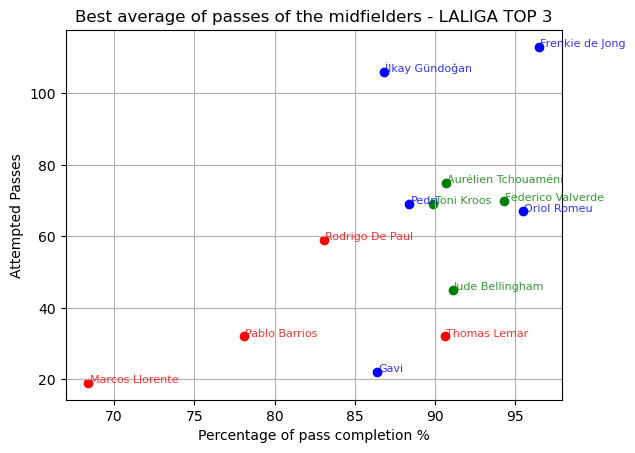

In [8]:
#### Scatter each team
data.scatter_match(madrid_passes[('Total', 'Cmp%')], madrid_passes[('Total', 'Att')], madrid_passes[('Unnamed: 0_level_0', 'Player')], 'green')
data.scatter_match(barcelona_passes[('Total', 'Cmp%')], barcelona_passes[('Total', 'Att')], barcelona_passes[('Unnamed: 0_level_0', 'Player')], 'blue')
data.scatter_match(atletico_passes[('Total', 'Cmp%')], atletico_passes[('Total', 'Att')], atletico_passes[('Unnamed: 0_level_0', 'Player')], 'red')

#### Competition
league = 'LALIGA TOP 3'

#### styles:
plt.title(f'Best average of passes of the midfielders - {league}')
plt.xlabel('Percentage of pass completion %')
plt.ylabel('Attempted Passes')
plt.grid(True)